In [20]:
import os
import re
import math
import string
import unicodedata
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
imd = pd.read_csv(os.path.join('IMD_2019.csv'),low_memory=False)

In [64]:
imd.head(3)

,lsoa_code,lsoa,borough_code,msoa,area,borough,Index of Multiple Deprivation (IMD) Score,Income Score (rate),Employment Score (rate),"Education, Skills and Training Score",Health Deprivation and Disability Score,Crime Score,Barriers to Housing and Services Score,Living Environment Score
0,E01000001,City of London 001A,E09000001,E02000001,Inner West,City of London,6.2,0.0,0.0,0.0,-1.7,-2.0,29.5,31.9
1,E01000002,City of London 001B,E09000001,E02000001,Inner West,City of London,5.1,0.0,0.0,0.1,-1.1,-2.3,24.4,23.1
2,E01000003,City of London 001C,E09000001,E02000001,Inner West,City of London,19.4,0.1,0.1,5.8,-0.1,-1.0,40.1,40.5


In [3]:
ptal = pd.read_csv(os.path.join('PTAL.csv'),low_memory=False)

In [66]:
ptal.head()

,LSOA,Av PTAI,Av PTAL
0,E01001072,0.093953,1a
1,E01004117,0.203936,1a
2,E01002438,0.234229,1a
3,E01002391,0.255038,1a
4,E01000720,0.283715,1a


In [4]:
data=pd.merge(imd,ptal,left_on='lsoa_code',right_on='LSOA')
data.head(3)

,lsoa_code,lsoa,borough_code,msoa,area,borough,Index of Multiple Deprivation (IMD) Score,Income Score (rate),Employment Score (rate),"Education, Skills and Training Score",Health Deprivation and Disability Score,Crime Score,Barriers to Housing and Services Score,Living Environment Score,LSOA,Av PTAI,Av PTAL
0,E01000001,City of London 001A,E09000001,E02000001,Inner West,City of London,6.2,0.0,0.0,0.0,-1.7,-2.0,29.5,31.9,E01000001,51.1698,6b
1,E01000002,City of London 001B,E09000001,E02000001,Inner West,City of London,5.1,0.0,0.0,0.1,-1.1,-2.3,24.4,23.1,E01000002,50.5712,6b
2,E01000003,City of London 001C,E09000001,E02000001,Inner West,City of London,19.4,0.1,0.1,5.8,-0.1,-1.0,40.1,40.5,E01000003,28.4376,6a


In [5]:
cols=data.columns.values
cols

array(['lsoa_code', 'lsoa', 'borough_code', 'msoa', 'area', 'borough',
       'Index of Multiple Deprivation (IMD) Score', 'Income Score (rate)',
       'Employment Score (rate)', 'Education, Skills and Training Score',
       'Health Deprivation and Disability Score', 'Crime Score',
       'Barriers to Housing and Services Score',
       'Living Environment Score', 'LSOA', 'Av PTAI', 'Av PTAL'],
      dtype=object)

In [6]:
cols=data.columns.values
cols[6]='imd'
cols[7]='income'
cols[8]='employment'
cols[9]='education'
cols[10]='health'
cols[11]='crime'
cols[12]='housing'
cols[13]='environment'
cols[14]='code'
cols[15]='ptai'
cols[16]='ptal'
data.columns=cols
data.head(3)

,lsoa_code,lsoa,borough_code,msoa,area,borough,imd,income,employment,education,health,crime,housing,environment,code,ptai,ptal
0,E01000001,City of London 001A,E09000001,E02000001,Inner West,City of London,6.2,0.0,0.0,0.0,-1.7,-2.0,29.5,31.9,E01000001,51.1698,6b
1,E01000002,City of London 001B,E09000001,E02000001,Inner West,City of London,5.1,0.0,0.0,0.1,-1.1,-2.3,24.4,23.1,E01000002,50.5712,6b
2,E01000003,City of London 001C,E09000001,E02000001,Inner West,City of London,19.4,0.1,0.1,5.8,-0.1,-1.0,40.1,40.5,E01000003,28.4376,6a


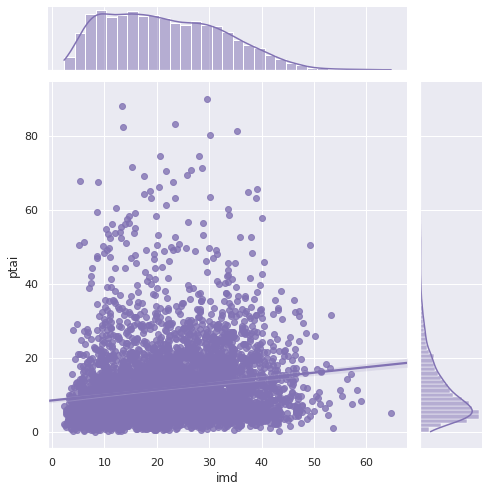

In [70]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="imd", y="ptai", data=data,
                  kind="reg", truncate=False,
                  color="m", height=7)

In [71]:
model = sm.formula.ols('ptai~imd', data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ptai   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     128.8
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           1.78e-29
Time:                        01:22:42   Log-Likelihood:                -17991.
No. Observations:                4835   AIC:                         3.599e+04
Df Residuals:                    4833   BIC:                         3.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5320      0.318     26.843      0.000       7.909       9.155
imd            0.1496      0.013     11.349      0.000       0.124       0.175
==============================================================================
Omnibus:                     2701.314   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24599.236
Skew:                           2.547   Prob(JB):                         0.00
Kurtosis:                      12.806   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

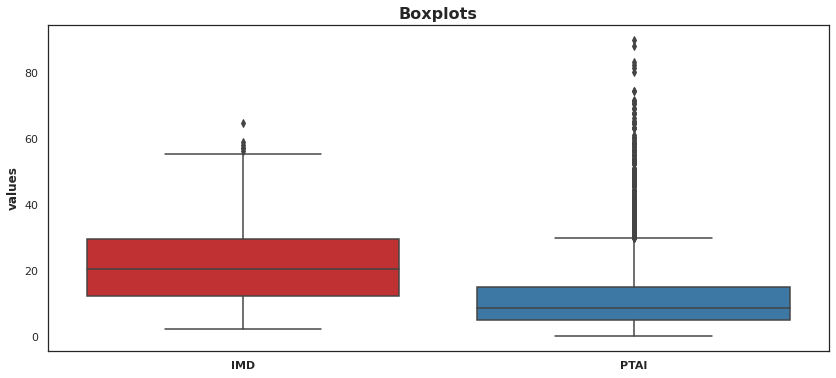

In [79]:
#Boxplots of both variables

fig, ax = plt.subplots(figsize=(14,6))
ax = sns.boxplot(data=data[['imd','ptai']], palette=['#d7191c','#2c7bb6'])
ax.set_ylabel('values',fontweight='bold')
plt.title('Boxplots',fontsize=16,fontweight='bold')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'IMD'
labels[1] = 'PTAI'
ax.set_xticklabels(labels,fontweight='bold')
plt.savefig('boxplot.png')

In [7]:
#Select relevant variables 
data_sc=data.drop(columns=['income','employment','education','health','crime','housing','environment','code'])

In [8]:
data_sc[['imd','ptai']].describe(percentiles=[.1,.5,.9], include=None)

,imd,ptai
count,4835.000000,4835.000000
mean,21.498676,11.748953
std,10.904651,10.128085
min,2.300000,0.093953
10%,7.700000,3.280332
50%,20.400000,8.700220
90%,36.700000,23.392260
max,64.700000,89.884800


In [9]:
#IDR Scalling of Variable imd
imd_sc=[]
for i in data_sc['imd']:
    if i>=20.4:
        imd_sc.append((i-20.4)/(36.7-20.4))
    else:
        imd_sc.append((i-20.4)/(20.4-7.7))
data_sc['imd_sc']=imd_sc
data_sc.head()
                

,lsoa_code,lsoa,borough_code,msoa,area,borough,imd,ptai,ptal,imd_sc
0,E01000001,City of London 001A,E09000001,E02000001,Inner West,City of London,6.2,51.1698,6b,-1.118110
1,E01000002,City of London 001B,E09000001,E02000001,Inner West,City of London,5.1,50.5712,6b,-1.204724
2,E01000003,City of London 001C,E09000001,E02000001,Inner West,City of London,19.4,28.4376,6a,-0.078740
3,E01000005,City of London 001E,E09000001,E02000001,Inner West,City of London,28.7,71.3226,6b,0.509202
4,E01032739,City of London 001F,E09000001,E02000001,Inner West,City of London,13.6,82.3987,6b,-0.535433


In [10]:
#IDR Scalling of Variable ptai
ptai_sc=[]
for i in data_sc['ptai']:
    if i>=8.700220:
        ptai_sc.append((i-8.700220)/(23.392260-8.700220))
    else:
        ptai_sc.append((i-8.700220)/(8.700220-3.280332))
data_sc['ptai_sc']=ptai_sc
data_sc.head()
                

,lsoa_code,lsoa,borough_code,msoa,area,borough,imd,ptai,ptal,imd_sc,ptai_sc
0,E01000001,City of London 001A,E09000001,E02000001,Inner West,City of London,6.2,51.1698,6b,-1.118110,2.890652
1,E01000002,City of London 001B,E09000001,E02000001,Inner West,City of London,5.1,50.5712,6b,-1.204724,2.849909
2,E01000003,City of London 001C,E09000001,E02000001,Inner West,City of London,19.4,28.4376,6a,-0.078740,1.343406
3,E01000005,City of London 001E,E09000001,E02000001,Inner West,City of London,28.7,71.3226,6b,0.509202,4.262334
4,E01032739,City of London 001F,E09000001,E02000001,Inner West,City of London,13.6,82.3987,6b,-0.535433,5.016218


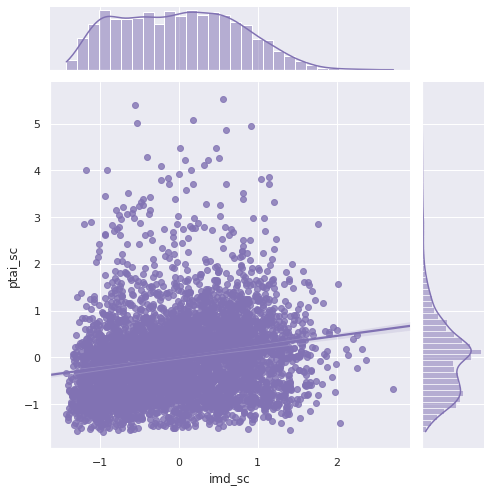

In [77]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="imd_sc", y="ptai_sc", data=data_sc,
                  kind="reg", truncate=False,
                  color="m", height=7)

In [78]:
model = sm.formula.ols('ptai_sc~imd_sc', data_sc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ptai_sc   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     193.4
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           3.80e-43
Time:                        01:22:59   Log-Likelihood:                -6116.5
No. Observations:                4835   AIC:                         1.224e+04
Df Residuals:                    4833   BIC:                         1.225e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0012      0.012      0.097      0.922      -0.023       0.025
imd_sc         0.2299      0.017     13.908      0.000       0.197       0.262
==============================================================================
Omnibus:                     1316.066   Durbin-Watson:                   0.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4721.499
Skew:                           1.331   Prob(JB):                         0.00
Kurtosis:                       7.043   Cond. No.                         1.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

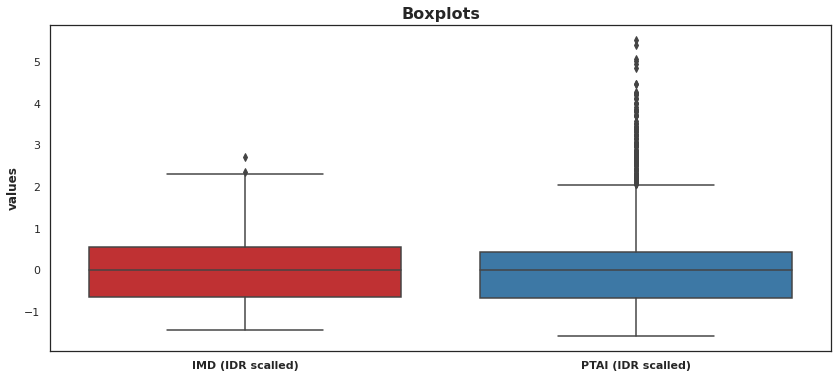

In [78]:
#Boxplots of both variables

fig, ax = plt.subplots(figsize=(14,6))
ax = sns.boxplot(data=data_sc[['imd_sc','ptai_sc']], palette=['#d7191c','#2c7bb6'])
ax.set_ylabel('values',fontweight='bold')
plt.title('Boxplots',fontsize=16,fontweight='bold')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'IMD (IDR scalled)'
labels[1] = 'PTAI (IDR scalled)'
ax.set_xticklabels(labels,fontweight='bold')
plt.savefig('boxplot scalled.png')

In [77]:
tabla2=data_sc.describe()
tabla2.to_csv('resultados 2.csv')

In [12]:
data_sc.groupby('area')['area'].count()

area
 Inner East                   1233
 Inner West                    662
 Outer East and North East    1045
 Outer South                   760
 Outer West and North West    1135
Name: area, dtype: int64

In [73]:
# Sets some handy 'keywords' to tweak the Seaborn plot
kwds = dict(s=7,alpha=0.95,edgecolor="none")
# Set the *hue order* so that all plots have some colouring by Subregion
ho = ['Inner East','Inner West','Outer West and North West','Outer South','Outer East and North East']

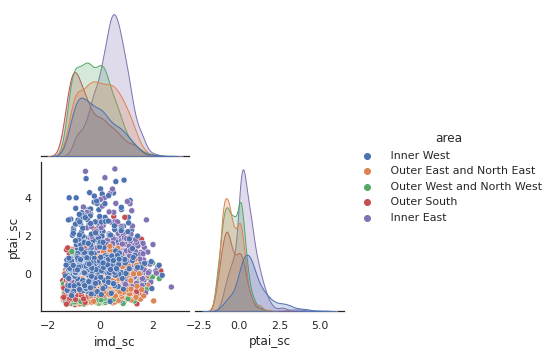

In [75]:
sns.pairplot(data=data_sc,vars=['imd_sc','ptai_sc'], hue='area', diag_kind='kde', corner=True);
plt.savefig('scatter area.png')

In [84]:
data_sc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 4834
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lsoa_code     4835 non-null   object 
 1   lsoa          4835 non-null   object 
 2   borough_code  4835 non-null   object 
 3   msoa          4835 non-null   object 
 4   area          4835 non-null   object 
 5   borough       4835 non-null   object 
 6   imd           4835 non-null   float64
 7   ptai          4835 non-null   float64
 8   ptal          4835 non-null   object 
 9   imd_sc        4835 non-null   float64
 10  ptai_sc       4835 non-null   float64
dtypes: float64(4), object(7)
memory usage: 453.3+ KB


In [13]:
#Clustering dataframe
cldf=data_sc[['imd_sc','ptai_sc']]
cldf.describe()

,imd_sc,ptai_sc
count,4835.000000,4835.000000
mean,-0.002344,0.000662
std,0.746162,0.874444
min,-1.425197,-1.587905
25%,-0.629921,-0.655218
50%,0.000000,0.000000
75%,0.564417,0.430364
max,2.717791,5.525753


In [30]:
c_nm   = 'KMeans' # Clustering name
k_pref = 5 # Number of clusters

kmeans = sklc.KMeans(n_clusters=k_pref, n_init=25, random_state=42).fit(cldf) # The process

print(kmeans.labels_) # The results

[1 1 1 ... 3 2 3]


In [31]:
# Add it to the data frame
data_sc['cluster'] = pd.Series(kmeans.labels_, index=cldf.index)

In [16]:
data_sc.head()

,lsoa_code,lsoa,borough_code,msoa,area,borough,imd,ptai,ptal,imd_sc,ptai_sc,cluster
0,E01000001,City of London 001A,E09000001,E02000001,Inner West,City of London,6.2,51.1698,6b,-1.118110,2.890652,5
1,E01000002,City of London 001B,E09000001,E02000001,Inner West,City of London,5.1,50.5712,6b,-1.204724,2.849909,5
2,E01000003,City of London 001C,E09000001,E02000001,Inner West,City of London,19.4,28.4376,6a,-0.078740,1.343406,3
3,E01000005,City of London 001E,E09000001,E02000001,Inner West,City of London,28.7,71.3226,6b,0.509202,4.262334,5
4,E01032739,City of London 001F,E09000001,E02000001,Inner West,City of London,13.6,82.3987,6b,-0.535433,5.016218,5


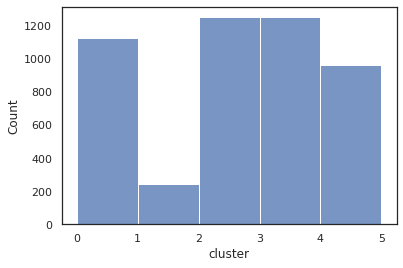

In [71]:
# How are the clusters distributed?
ax = sns.histplot(data=data_sc, x='cluster', bins=[0,1,2,3,4,5]);
plt.savefig('count cluster.png')

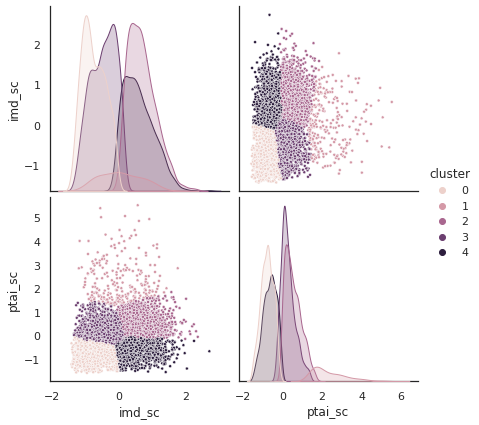

In [68]:
# Going to be a bit hard to read if 
# we plot every variable against every
# other variables, so we'll just pick a few
sns.set(style="white")
sns.pairplot(data_sc, 
             vars=['imd_sc','ptai_sc'], 
             hue='cluster', markers=".", height=3, diag_kind='kde');
plt.savefig('scatter-cluster.png')

In [35]:
#Spatial data
lsoas = gpd.read_file(os.path.join('LSOAs.gpkg'), driver='GPKG')

In [36]:
lsoas.head(1)

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,layer,path,geometry
0,E01000056,Barking and Dagenham 018C,E02000019,Barking and Dagenham 018,E09000002,Barking and Dagenham,E12000007,London,1584,1542,42,65.0,573,2.7,LSOA_2011_BFC_Barking_and_Dagenham,C:\Users\pilla\OneDrive - University College L...,"MULTIPOLYGON (((548159.688 183849.000, 548159...."


In [37]:
gdf = pd.merge(lsoas, data_sc, left_on='LSOA11CD', right_on='lsoa_code', how='inner')

In [109]:
gdf.head(1)

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,borough_code,msoa,area,borough,imd,ptai,ptal,imd_sc,ptai_sc,cluster
0,E01000056,Barking and Dagenham 018C,E02000019,Barking and Dagenham 018,E09000002,Barking and Dagenham,E12000007,London,1584,1542,...,E09000002,E02000019,Outer East and North East,Barking and Dagenham,35.9,1.59312,1a,0.95092,-1.3113,4


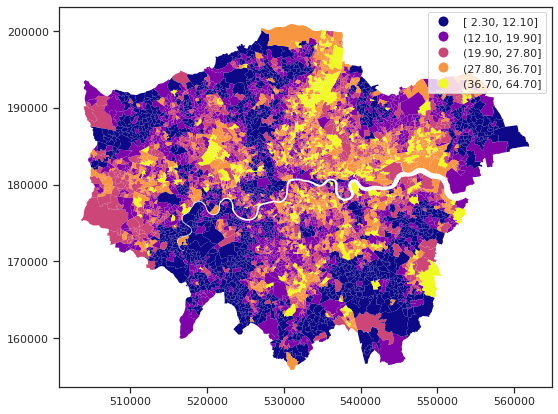

In [67]:
gdf.plot(column='imd', cmap='plasma', 
         scheme='FisherJenks', k=k_pref, edgecolor='None', legend=True, figsize=(9,7))
plt.savefig('spatial deprived.png')

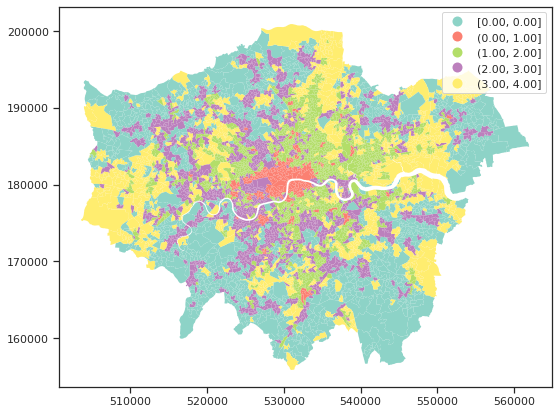

In [66]:
gdf.plot(column='cluster', cmap='Set3', scheme='FisherJenks',
         k=k_pref, edgecolor='None', legend=True, figsize=(9,7))
plt.savefig('spatial cluster.png')

In [141]:
data_sc.head()

,lsoa_code,lsoa,borough_code,msoa,area,borough,imd,ptai,ptal,imd_sc,ptai_sc,cluster
0,E01000001,City of London 001A,E09000001,E02000001,Inner West,City of London,6.2,51.1698,6b,-1.118110,2.890652,1
1,E01000002,City of London 001B,E09000001,E02000001,Inner West,City of London,5.1,50.5712,6b,-1.204724,2.849909,1
2,E01000003,City of London 001C,E09000001,E02000001,Inner West,City of London,19.4,28.4376,6a,-0.078740,1.343406,1
3,E01000005,City of London 001E,E09000001,E02000001,Inner West,City of London,28.7,71.3226,6b,0.509202,4.262334,1
4,E01032739,City of London 001F,E09000001,E02000001,Inner West,City of London,13.6,82.3987,6b,-0.535433,5.016218,1


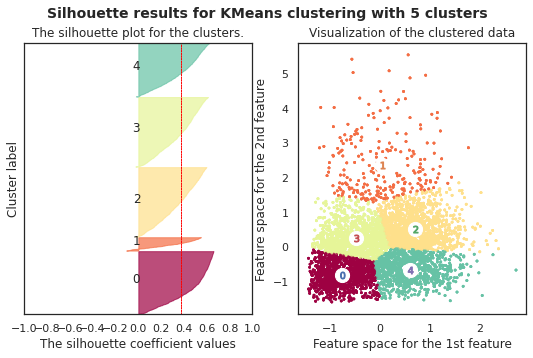

In [80]:
k_pref=5
    
#############
# Do the clustering using the main columns
kmeans = sklc.KMeans(n_clusters=k_pref, n_init=25, random_state=42).fit(cldf)

# Convert to a series
s = pd.Series(kmeans.labels_, index=cldf.index, name=c_nm)

# Calculate the overall silhouette score
silhouette_avg = silhouette_score(cldf, kmeans.labels_)

# Calculate the silhouette values
sample_silhouette_values = silhouette_samples(cldf, kmeans.labels_)
    
#############
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(9, 5)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1
ax1.set_xlim([-1.0, 1.0]) # Changed from -0.1, 1
    
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, cldf.shape[0] + (k_pref + 1) * 10])
    
y_lower = 10
    
# For each of the clusters...
for i in range(k_pref):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[kmeans.labels_ == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
        
    # Set the color ramp
    color = plt.cm.Spectral(i/k_pref)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=0.5)

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks(np.arange(-1.0, 1.1, 0.2)) # Was: [-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]

    # 2nd Plot showing the actual clusters formed --
    # we can only do this for the first two dimensions
    # so we may not see fully what is causing the 
    # resulting assignment
    colors = plt.cm.Spectral(kmeans.labels_.astype(float) / k_pref)
    ax2.scatter(cldf[cldf.columns[0]], cldf[cldf.columns[1]], 
                marker='.', s=30, lw=0, alpha=0.7, c=colors)

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("Visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette results for KMeans clustering "
                "with %d clusters" % k_pref),
                fontsize=14, fontweight='bold')

plt.savefig('siloutte cluster.png')

In [ ]:
#------------------

In [26]:
data_sc.to_csv('scalled data.csv')

.......................................
Largest silhouette score was 0.3751 for k=5


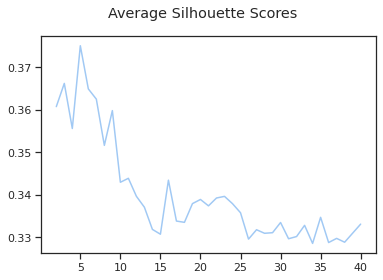

In [64]:
# Adapted from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples, silhouette_score

x = []
y = []

for k in range(2,41):
    
    #############
    # Do the clustering using the main columns
    kmeans = sklc.KMeans(n_clusters=k, n_init=25, random_state=42).fit(cldf)
    
    # Calculate the overall silhouette score
    silhouette_avg = silhouette_score(cldf, kmeans.labels_)
    
    y.append(k)
    x.append(silhouette_avg)
    
    print('.', end='')

print()
print(f"Largest silhouette score was {max(x):6.4f} for k={y[x.index(max(x))]}")

plt.plot(y, x)
plt.gcf().suptitle("Average Silhouette Scores");
plt.savefig('siloutte.png')

In [28]:
x

[0.3607697145517563,
 0.36623723701118716,
 0.3556287070737603,
 0.37509788754683604,
 0.364942682144704,
 0.36253217149227573,
 0.35165806457593457,
 0.35983771145436544,
 0.34297788106885313,
 0.3439113519020228,
 0.3396775646602335,
 0.3371024178655803,
 0.33188532863387155,
 0.33075481651646815,
 0.3434663274341153,
 0.3338495470811855,
 0.3335479358093947,
 0.33795240906895807,
 0.33892911124023,
 0.33742713112389,
 0.33927249673596954,
 0.33965729145883705,
 0.33794037504685903,
 0.33580442750272266,
 0.3296014299415774,
 0.3318100758237833,
 0.3309721517747878,
 0.33111159462218914,
 0.3335078913463181,
 0.32968716986287816,
 0.3302072844019836,
 0.33284118649782657,
 0.3285888145272234,
 0.3347287915568892,
 0.3287967337166373,
 0.3297720179922595,
 0.32887089642280487,
 0.33100036138004313,
 0.3331305220203554]

In [29]:
y

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [45]:
data_sc.head()

,lsoa_code,lsoa,borough_code,msoa,area,borough,imd,ptai,ptal,imd_sc,ptai_sc,cluster
0,E01000001,City of London 001A,E09000001,E02000001,Inner West,City of London,6.2,51.1698,6b,-1.118110,2.890652,1
1,E01000002,City of London 001B,E09000001,E02000001,Inner West,City of London,5.1,50.5712,6b,-1.204724,2.849909,1
2,E01000003,City of London 001C,E09000001,E02000001,Inner West,City of London,19.4,28.4376,6a,-0.078740,1.343406,1
3,E01000005,City of London 001E,E09000001,E02000001,Inner West,City of London,28.7,71.3226,6b,0.509202,4.262334,1
4,E01032739,City of London 001F,E09000001,E02000001,Inner West,City of London,13.6,82.3987,6b,-0.535433,5.016218,1


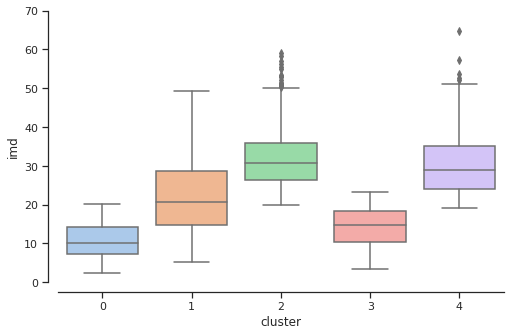

In [63]:
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="pastel")
f,ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=data_sc.imd, x=data_sc.cluster)
sns.despine(offset=10)
ax.set_ylim([0,70])
plt.savefig('imd-cluster.png')

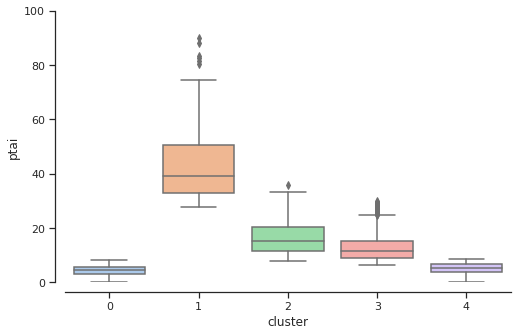

In [62]:
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="pastel")
f,ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=data_sc.ptai, x=data_sc.cluster)
sns.despine(offset=10)
ax.set_ylim([0,100])
plt.savefig('ptai-cluster.png')

In [57]:
tabla=data_sc.groupby('cluster')['imd','ptai'].describe()

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [61]:
tabla.to_csv('resultados.csv')